By The End Of This Session You Should Be Able To:
----

- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners
- Use variables to _D.R.Y. out your code_  (DRY = don't repeat yourself)

Load the `trips` data into a dataframe.  

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
trips = pd.read_csv('data/bike_share_201402_trip_data.csv')
trips.head()

Trip ID  Duration       Start Date             Start Station  \
0     4576        63  8/29/2013 14:13  South Van Ness at Market   
1     4607        70  8/29/2013 14:42        San Jose City Hall   
2     4130        71  8/29/2013 10:16   Mountain View City Hall   
3     4251        77  8/29/2013 11:29        San Jose City Hall   
4     4299        83  8/29/2013 12:02  South Van Ness at Market   

   Start Terminal         End Date               End Station  End Terminal  \
0              66  8/29/2013 14:14  South Van Ness at Market            66   
1              10  8/29/2013 14:43        San Jose City Hall            10   
2              27  8/29/2013 10:17   Mountain View City Hall            27   
3              10  8/29/2013 11:30        San Jose City Hall            10   
4              66  8/29/2013 12:04            Market at 10th            67   

   Bike # Subscription Type Zip Code  
0     520        Subscriber    94127  
1     661        Subscriber    95138  
2      48        Subscriber    97214  
3      26        Subscriber    95060  
4     319        Subscriber    94103

How many observations are there?

In [160]:
trips.shape    # 144015

(144015, 11)

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 

<br>

<details><summary>
Click here for a hint…
</summary>
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb#Renaming-Columns
</details>

In [163]:
# Converting column names to lowercase
trips.columns = [c.lower() for c in trips.columns]
trips.columns = [c.replace(' ', '_') for c in trips.columns]
trips.columns = [c.replace('#', 'num') for c in trips.columns]

trips.head()

trip_id  duration       start_date             start_station  \
0     4576        63  8/29/2013 14:13  South Van Ness at Market   
1     4607        70  8/29/2013 14:42        San Jose City Hall   
2     4130        71  8/29/2013 10:16   Mountain View City Hall   
3     4251        77  8/29/2013 11:29        San Jose City Hall   
4     4299        83  8/29/2013 12:02  South Van Ness at Market   

   start_terminal         end_date               end_station  end_terminal  \
0              66  8/29/2013 14:14  South Van Ness at Market            66   
1              10  8/29/2013 14:43        San Jose City Hall            10   
2              27  8/29/2013 10:17   Mountain View City Hall            27   
3              10  8/29/2013 11:30        San Jose City Hall            10   
4              66  8/29/2013 12:04            Market at 10th            67   

   bike_num subscription_type zip_code  
0       520        Subscriber    94127  
1       661        Subscriber    95138  
2        48        Subscriber    97214  
3        26        Subscriber    95060  
4       319        Subscriber    94103

How many types of subscription options are there?

In [164]:
trips.subscription_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [165]:
trips.subscription_type.describe()

count         144015
unique             2
top       Subscriber
freq          113647
Name: subscription_type, dtype: object

What is the frequency of each subscription option?

In [166]:
trips.subscription_type.value_counts()

Subscriber    113647
Customer       30368
Name: subscription_type, dtype: int64

Please plot the frequency of each subscription option with pie chart:

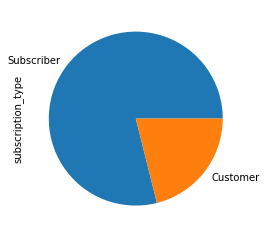

In [167]:
trips.subscription_type.value_counts().plot(kind='pie');

Please plot the frequency of each subscription option with bar chart:

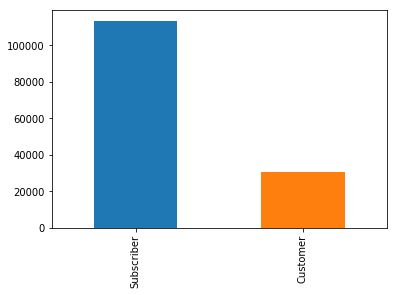

In [168]:
trips.subscription_type.value_counts().plot(kind='bar');

Repeat same analysis for start_station but sorted from high to low.

In [169]:
trips.start_station.unique()
trips.start_station.value_counts().head()

San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Name: start_station, dtype: int64

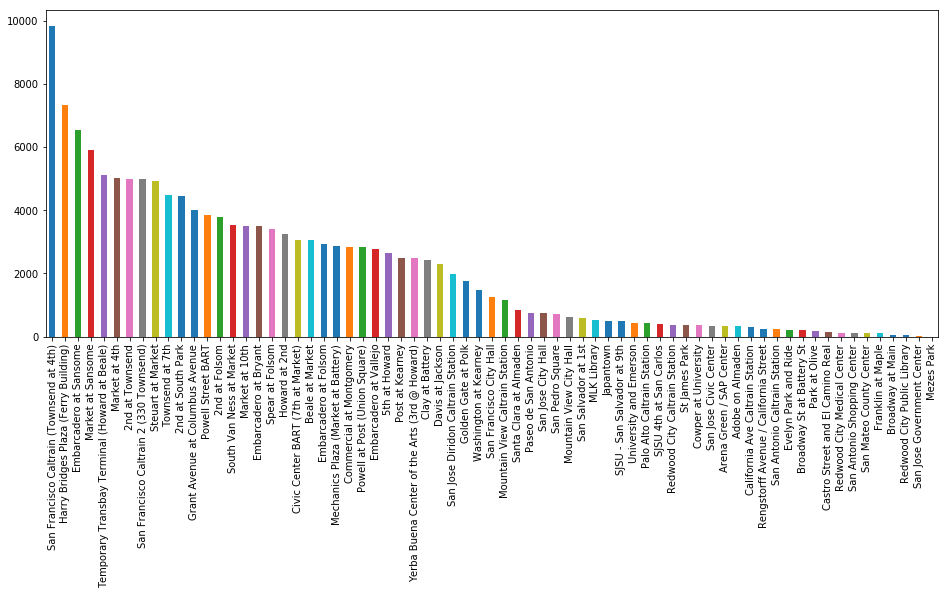

In [170]:
trips.start_station.value_counts().plot(kind='bar', figsize=(16, 6));

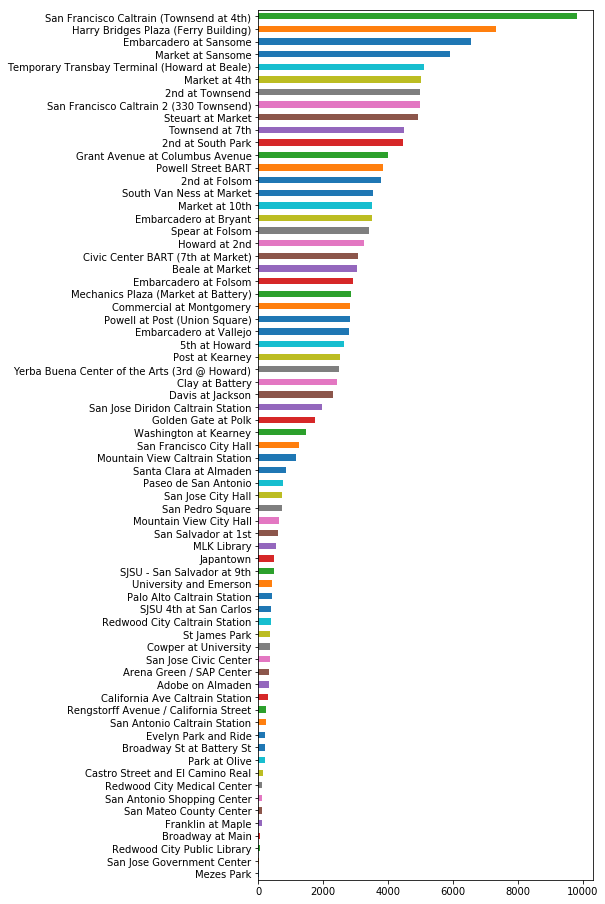

In [171]:
# trips.start_station.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(6, 16));
trips.start_station.value_counts(ascending=True).plot(kind='barh', figsize=(6, 16));

Repeat same analysis for end_station but sorted from __low to high__.

In [173]:
trips.end_station.value_counts(ascending=True).head()

Mezes Park                      5
San Jose Government Center     23
Broadway at Main               56
San Antonio Shopping Center    93
Franklin at Maple              93
Name: end_station, dtype: int64

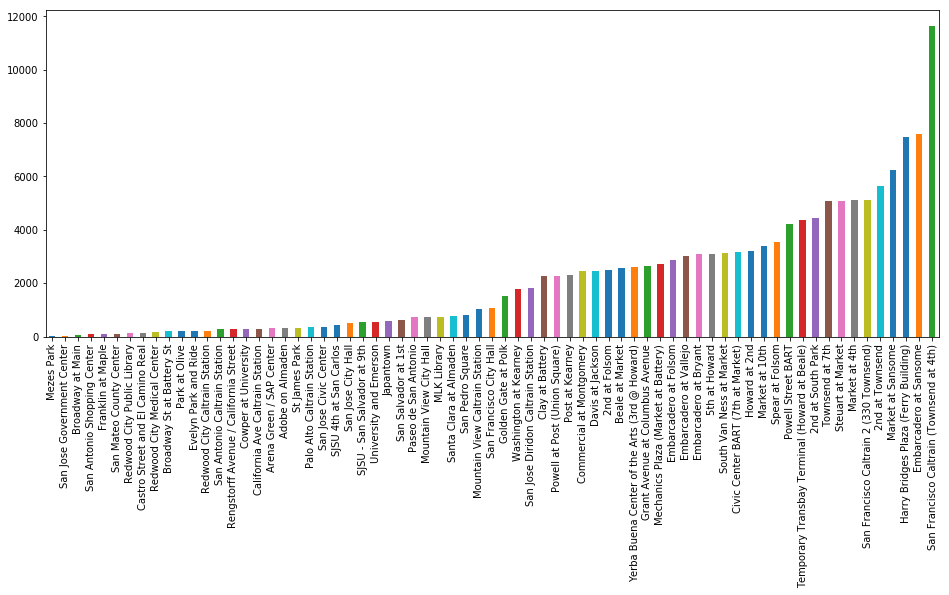

In [174]:
trips.end_station.value_counts(ascending=True).plot(kind = 'bar', figsize=(16,6));

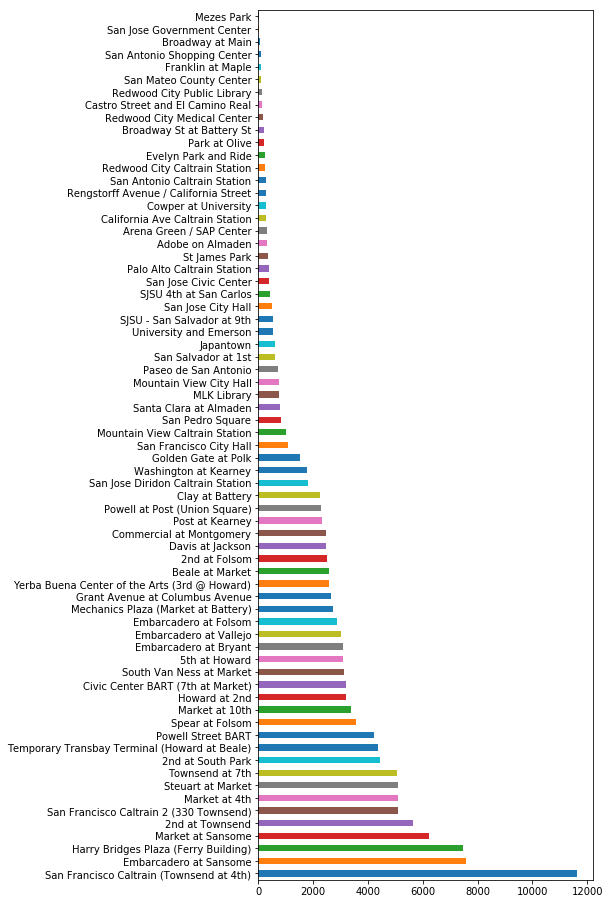

In [175]:
trips.end_station.value_counts(ascending=False).plot(kind = 'barh', figsize=(6,16));

Looking at just most popular stations, what are the qualitative similarities and differences between start and end stations?

In [ ]:
# Top start and end stations are the same, they include:
#    San Francisco, Embarcadero, Harry Bridges, Market at Sansome, and 2nd at Townsend

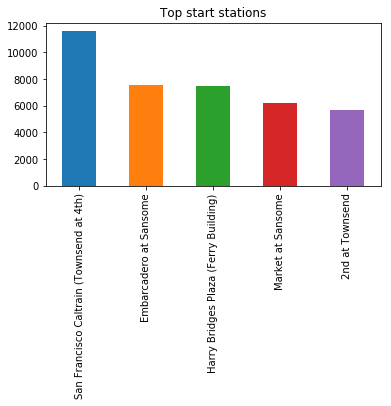

In [176]:
trips.end_station.value_counts(ascending=False)[:5].plot(kind = 'bar', 
                                                         figsize=(6,3), title = 'Top start stations');

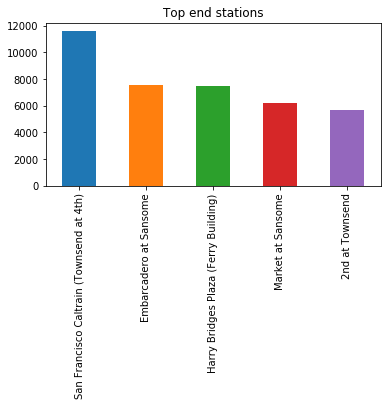

In [177]:
trips.end_station.value_counts(ascending=False)[:5].plot(kind = 'bar', 
                                                         figsize=(6,3), title='Top end stations');

Create a table that has start_station segmented by subscription_type.

Include the marginals
<br>
<br>
<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

In [178]:
trips_cross = pd.crosstab(index = trips.start_station, columns = trips.subscription_type, margins = True)
trips_cross.head()

subscription_type  Customer  Subscriber   All
start_station                                
2nd at Folsom           427        3349  3776
2nd at South Park       535        3923  4458
2nd at Townsend         882        4105  4987
5th at Howard           606        2029  2635
Adobe on Almaden         75         260   335

-----

Let's look at duration....

How long is the shortest trip? How many are that short?  --> 60 seconds, 17x

In [179]:
trips.duration.min()

60

In [227]:
# Option 1:
trips.duration.eq(trips.duration.min(), axis=0).sum()

17

In [181]:
# Option 2: 
trips[trips.duration == trips.duration.min()].shape[0]

17

In [244]:
# Option 3:
trips.duration.value_counts().sort_index().head(1)

60    17
Name: duration, dtype: int64

In [243]:
# Option 4:
trips.groupby('duration').trip_id.count().head(1)

duration
60    17
Name: trip_id, dtype: int64

What do you think is going on with the shrort trips?

In [182]:
# Probably the minimum duration to hire a bike is 60 seconds (or at least the duration is rounded to minutes)

What is the longest trip? How many trips are "long"?

In [183]:
trips.duration.max()

722236

In [245]:
# Option 1:
trips.duration.eq(trips.duration.max(), axis=0).sum()

1

In [184]:
# Option 2: 
trips[trips.duration == trips.duration.max()].shape[0]

1

In [247]:
trips.sort_values('duration', ascending = False).head(3)

trip_id  duration          start_date  \
80510   111309    722236 2013-11-30 13:29:00   
93400   129504    619322 2013-12-18 09:16:00   
20535    32121    597517 2013-09-23 18:24:00   

                           start_station  start_terminal            end_date  \
80510             university_and_emerson              35 2013-12-08 22:06:00   
93400  san_jose_diridon_caltrain_station               2 2013-12-25 13:18:00   
20535    california_ave_caltrain_station              36 2013-09-30 16:23:00   

                      end_station  end_terminal  bike_num subscription_type  \
80510      university_and_emerson            35       247          Customer   
93400      sjsu_4th_at_san_carlos            12       653        Subscriber   
20535  palo_alto_caltrain_station            34       168          Customer   

      zip_code  start_month  start_hour  end_month  end_hour  
80510    94301           11          13         12        22  
93400    94041           12           9         12        13  
20535    95051            9          18          9        16

Do the long durations seem reasonable? Why are they so long? What could that tell us about the users?

In [248]:
# 722236 seconds = ca. 200 hours = more than 8 days
# --> maybe they forgot returning the bike or did a longer bike trip for several days

Timebox 15 minutes to explore the data guided by your own intuition or hypotheses…

Be prepared to show something to the rest of class.

In [ ]:
# --> see below (in "Challenge Exercises") for my own data exploration and data visualization

-----
Challenge Exercises
-----

Plot duration

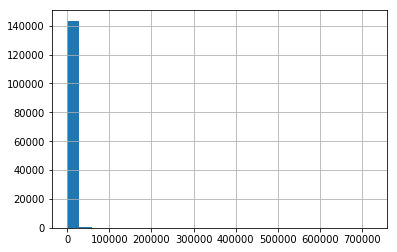

In [189]:
# Include all durations in histogram:
trips.duration.hist(bins=25);

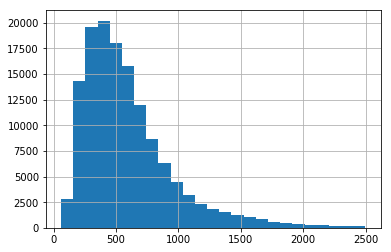

In [190]:
# Include only durations <2500 min in histogram:
trips.duration[trips.duration < 2500].hist(bins=25);

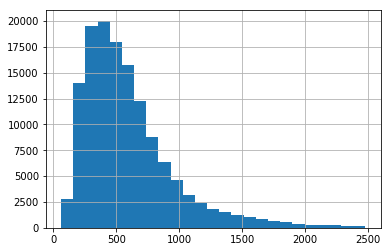

In [191]:
# Include only lowest 90% of durations in histogram:
trips.duration[trips.duration < trips.duration.quantile(0.95)].hist(bins=25);

Does that plot give insights?

In [ ]:
# yes, the distribution is heavily skewed to the left, 
# most durations are quite short (< 1000sec --> < 20min), probably short rides to work or bus/train stations
# only few durations are very long (>2500sec --> >30min), probably longer bike trips or users forgot to return bike

<br><br><br>Select subsections of the data to make a series of plots to enable insights for the Product Team<br><br>

In [200]:
# transform start_date and end_date to datetime (to better work with it):
trips.start_date = pd.to_datetime(trips.start_date)
trips.end_date = pd.to_datetime(trips.end_date)
trips.head()

trip_id  duration          start_date             start_station  \
0     4576        63 2013-08-29 14:13:00  south_van_ness_at_market   
1     4607        70 2013-08-29 14:42:00        san_jose_city_hall   
2     4130        71 2013-08-29 10:16:00   mountain_view_city_hall   
3     4251        77 2013-08-29 11:29:00        san_jose_city_hall   
4     4299        83 2013-08-29 12:02:00  south_van_ness_at_market   

   start_terminal            end_date               end_station  end_terminal  \
0              66 2013-08-29 14:14:00  south_van_ness_at_market            66   
1              10 2013-08-29 14:43:00        san_jose_city_hall            10   
2              27 2013-08-29 10:17:00   mountain_view_city_hall            27   
3              10 2013-08-29 11:30:00        san_jose_city_hall            10   
4              66 2013-08-29 12:04:00            market_at_10th            67   

   bike_num subscription_type zip_code  
0       520        Subscriber    94127  
1       661        Subscriber    95138  
2        48        Subscriber    97214  
3        26        Subscriber    95060  
4       319        Subscriber    94103

In [210]:
# create new series (columns) for start/end month and hour:
start_month = trips.start_date.apply(lambda d: d.month)
start_month.name = 'start_month'
start_hour = trips.start_date.apply(lambda d: d.hour)
start_hour.name = 'start_hour'

end_month = trips.end_date.apply(lambda d: d.month)
end_month.name = 'end_month'
end_hour = trips.end_date.apply(lambda d: d.hour)
end_hour.name = 'end_hour'

In [214]:
trips = pd.concat([trips, start_month, start_hour, end_month, end_hour], axis = 1)
trips.head()

trip_id  duration          start_date             start_station  \
0     4576        63 2013-08-29 14:13:00  south_van_ness_at_market   
1     4607        70 2013-08-29 14:42:00        san_jose_city_hall   
2     4130        71 2013-08-29 10:16:00   mountain_view_city_hall   
3     4251        77 2013-08-29 11:29:00        san_jose_city_hall   
4     4299        83 2013-08-29 12:02:00  south_van_ness_at_market   

   start_terminal            end_date               end_station  end_terminal  \
0              66 2013-08-29 14:14:00  south_van_ness_at_market            66   
1              10 2013-08-29 14:43:00        san_jose_city_hall            10   
2              27 2013-08-29 10:17:00   mountain_view_city_hall            27   
3              10 2013-08-29 11:30:00        san_jose_city_hall            10   
4              66 2013-08-29 12:04:00            market_at_10th            67   

   bike_num subscription_type zip_code  start_month  start_hour  end_month  \
0       520        Subscriber    94127            8          14          8   
1       661        Subscriber    95138            8          14          8   
2        48        Subscriber    97214            8          10          8   
3        26        Subscriber    95060            8          11          8   
4       319        Subscriber    94103            8          12          8   

   end_hour  
0        14  
1        14  
2        10  
3        11  
4        12

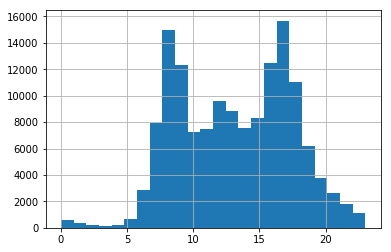

In [216]:
# Check distribution of start_hours throughout the day:
trips.start_hour.hist(bins = 24);

In [ ]:
# Seems that most bikes are used at rush-hour (around 9am and 5pm), or around noon (12am)

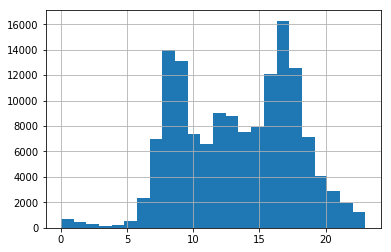

In [217]:
# Check distribution of end_hours throughout the day:
trips.end_hour.hist(bins = 24);

In [ ]:
# Nearly identical to start_hour distribution; makes sense, since most durations are very short (<15 min)

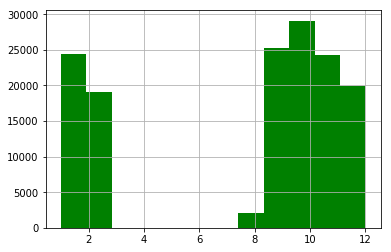

In [218]:
# Check distributions of start_months and end_months:
trips.start_month.hist(bins = 12, color='green');

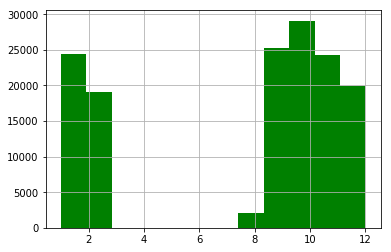

In [219]:
trips.end_month.hist(bins = 12, color='green');

In [249]:
# Seems that there are not data for the summer months in this data set. 
# Let's check this by looking at the earliest and latest start/end date in the data set:

trips.start_date.min(), trips.start_date.max()

(Timestamp('2013-08-29 09:08:00'), Timestamp('2014-02-28 23:20:00'))

In [224]:
trips.end_date.min(), trips.end_date.max()

(Timestamp('2013-08-29 09:11:00'), Timestamp('2014-03-02 16:52:00'))

In [ ]:
# Aha, the data set only includes bike rents between Aug 2013 and March 2014
# Thus, it makes less sense to do statistics with the start/end months or years, 
# since some months are not contained in the data set

In [ ]:
# But let's explore the start hours a bit more (we will stick with the start hours and not
# the end hours, since both start and end hours are nearly the same anyway (due to very short trip durations)

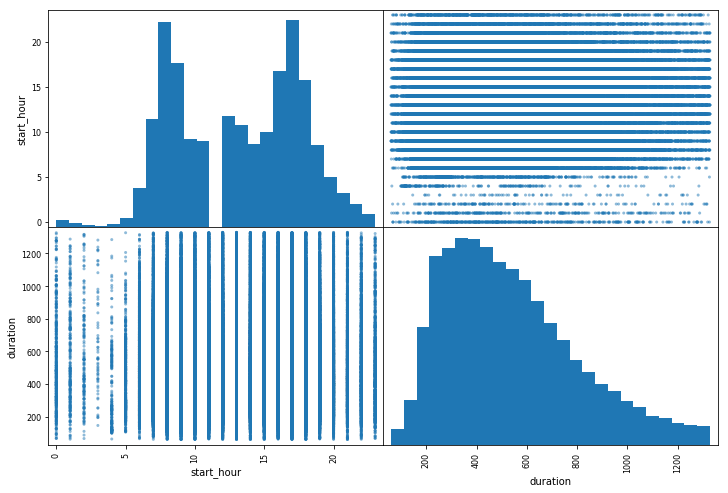

In [262]:
# Let's check how start_hour relates to duration, but we will only take data for durations within the
# 95% quantile (not the extremely long durations at the right tail of the distribution):
from pandas.plotting import scatter_matrix

trips2 = trips[trips.duration < trips.duration.quantile(0.90)]
scatter_matrix(trips2[["start_hour", "duration"]], diagonal='hist', figsize=(12,8),
               hist_kwds = {'bins': 25});

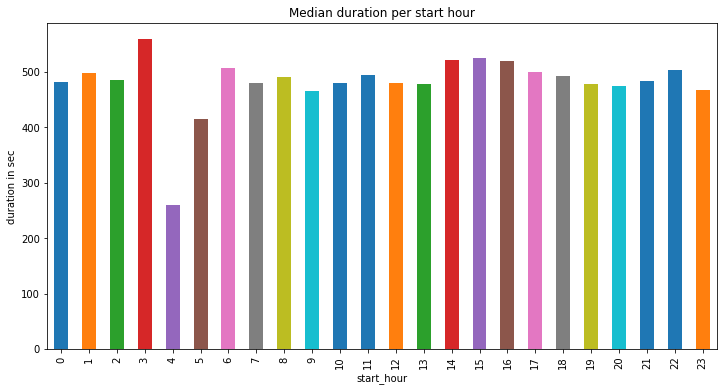

In [296]:
# Let's see the median duration per start hour:
trips2.groupby('start_hour').duration.median().plot(kind='bar', title='Median duration per start hour', 
                                                 figsize=(12,6));
plt.ylabel('duration in sec');

In [300]:
# Finally, let's check the median duration per start_hour and subscription_type:
trips_pivot = pd.pivot_table(data = trips2, values='duration', index='start_hour', 
                             columns='subscription_type', aggfunc=np.median)
trips_pivot

subscription_type  Customer  Subscriber
start_hour                             
0                     709.0       413.0
1                     764.0       419.0
2                     707.5       424.0
3                     668.0       524.0
4                     640.0       243.5
5                     468.0       402.0
6                     531.5       506.0
7                     557.0       475.0
8                     645.5       485.0
9                     633.0       453.0
10                    703.0       445.0
11                    738.0       439.0
12                    767.0       430.0
13                    745.0       427.0
14                    744.0       454.0
15                    725.0       471.0
16                    734.0       495.0
17                    722.0       479.0
18                    684.0       474.0
19                    709.0       449.0
20                    693.5       447.0
21                    690.5       451.0
22                    693.5       468.0
23                    659.0       419.0

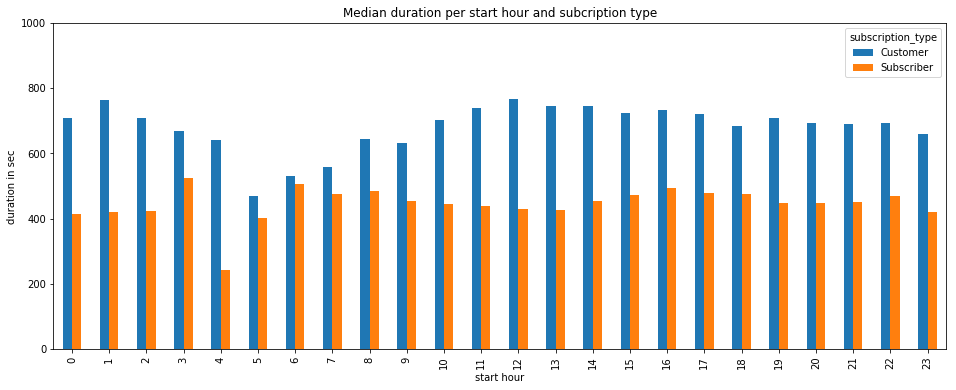

In [329]:
trips_pivot.plot(kind='bar', figsize=(16,6), ylim=(0,1000));  # colormap='winter'
plt.title('Median duration per start hour and subcription type')
plt.xlabel('start hour')
plt.ylabel('duration in sec');

---

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

In [192]:
trips.start_station = trips.start_station.apply(lambda x: x.replace(' ','_').lower()) 
trips.end_station = trips.end_station.apply(lambda x: x.replace(' ','_').lower())  
trips.head()

trip_id  duration       start_date             start_station  \
0     4576        63  8/29/2013 14:13  south_van_ness_at_market   
1     4607        70  8/29/2013 14:42        san_jose_city_hall   
2     4130        71  8/29/2013 10:16   mountain_view_city_hall   
3     4251        77  8/29/2013 11:29        san_jose_city_hall   
4     4299        83  8/29/2013 12:02  south_van_ness_at_market   

   start_terminal         end_date               end_station  end_terminal  \
0              66  8/29/2013 14:14  south_van_ness_at_market            66   
1              10  8/29/2013 14:43        san_jose_city_hall            10   
2              27  8/29/2013 10:17   mountain_view_city_hall            27   
3              10  8/29/2013 11:30        san_jose_city_hall            10   
4              66  8/29/2013 12:04            market_at_10th            67   

   bike_num subscription_type zip_code  
0       520        Subscriber    94127  
1       661        Subscriber    95138  
2        48        Subscriber    97214  
3        26        Subscriber    95060  
4       319        Subscriber    94103

In [153]:
# or in one line (but not nice here, since there are also other columns of type string that will change):

# trips = trips.applymap(lambda s: s.replace(' ','_').lower() if type(s) == str else s)
# trips.head()

trip_id  duration       start_date             start_station  \
0     4576        63  8/29/2013_14:13  south_van_ness_at_market   
1     4607        70  8/29/2013_14:42        san_jose_city_hall   
2     4130        71  8/29/2013_10:16   mountain_view_city_hall   
3     4251        77  8/29/2013_11:29        san_jose_city_hall   
4     4299        83  8/29/2013_12:02  south_van_ness_at_market   

   start_terminal         end_date               end_station  end_terminal  \
0              66  8/29/2013_14:14  south_van_ness_at_market            66   
1              10  8/29/2013_14:43        san_jose_city_hall            10   
2              27  8/29/2013_10:17   mountain_view_city_hall            27   
3              10  8/29/2013_11:30        san_jose_city_hall            10   
4              66  8/29/2013_12:04            market_at_10th            67   

   bike_num subscription_type zip_code  
0       520        subscriber    94127  
1       661        subscriber    95138  
2        48        subscriber    97214  
3        26        subscriber    95060  
4       319        subscriber    94103